# PyMySQL Demo 
## Using Python to Interact with MySQL Databases
Author: Kenneth Leung  
Link to article: https://towardsdatascience.com/pymysql-connecting-python-and-sql-for-data-science-91e7582d21d7
___

### (1) Initial Setup

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configuration parameters (ideally to be placed in separate config.py file)
PORT = 3306
DBNAME = 'pymysql-demo'
USERNAME = 'root'
ENDPOINT = '127.0.0.1'
PASSWORD = 'password'
CURSORCLASS = pymysql.cursors.DictCursor

___
### (2) Establish Connection to local MySQL Database

In [3]:
# Define function to establish MySQL database (local) connection
def initiate_local_connection():
    try:
        connection = pymysql.connect(host=ENDPOINT,
                                     port=PORT,
                                     user=USERNAME,
                                     passwd=PASSWORD,
                                     db=DBNAME,
                                     cursorclass=CURSORCLASS)
        print('[+] Local Connection Successful')
    except Exception as e:
        print(f'[+] Local Connection Failed: {e}')
        connection = None

    return connection

In [4]:
connection = initiate_local_connection()

[+] Local Connection Successful


___
### (3) Retrieve records

In [5]:
# Define SQL query
query = f'SELECT * FROM customers WHERE car_make = "BMW";'

In [6]:
def get_records(sql_query):
    try:
        with connection.cursor() as cursor:
            cursor.execute(sql_query)

        # Connection is not autocommit by default, so we must commit to save changes
        connection.commit()
        
        # Fetch all the records from SQL query output
        results = cursor.fetchall()
        
        # Convert results into pandas dataframe
        df = pd.DataFrame(results)
        
        print(f'Successfully retrieved records')
        
        return df
        
    except Exception as e:
        print(f'Error encountered: {e}')

In [7]:
# Execute data retrieval
df = get_records(query)
df.head()

Successfully retrieved records


,id,first_name,last_name,email,gender,car_make,race,freq_app_visit
0,1,Elianora,Vedeneev,evedeneev0@sphinn.com,Female,BMW,Puerto Rican,Never
1,8,Nestor,Tydd,ntydd7@smugmug.com,Male,BMW,Tohono O'Odham,Yearly
2,11,Kendall,Gofton,kgoftona@rakuten.co.jp,Male,BMW,Yakama,Often
3,73,Emera,Tropman,etropman20@amazon.co.uk,Female,BMW,Dominican (Dominican Republic),Seldom
4,78,Tibold,Greensall,tgreensall25@google.co.uk,Male,BMW,American Indian,Monthly


In [8]:
df

,id,first_name,last_name,email,gender,car_make,race,freq_app_visit
0,1,Elianora,Vedeneev,evedeneev0@sphinn.com,Female,BMW,Puerto Rican,Never
1,8,Nestor,Tydd,ntydd7@smugmug.com,Male,BMW,Tohono O'Odham,Yearly
2,11,Kendall,Gofton,kgoftona@rakuten.co.jp,Male,BMW,Yakama,Often
3,73,Emera,Tropman,etropman20@amazon.co.uk,Female,BMW,Dominican (Dominican Republic),Seldom
4,78,Tibold,Greensall,tgreensall25@google.co.uk,Male,BMW,American Indian,Monthly
5,85,Justis,Kopecka,jkopecka2c@vinaora.com,Male,BMW,Filipino,Yearly
6,147,Mirabel,Luggar,mluggar42@sciencedaily.com,Female,BMW,Samoan,Weekly
7,152,Rufus,Bushen,rbushen47@clickbank.net,Male,BMW,Tohono O'Odham,Weekly
8,169,Gennifer,Hasely,ghasely4o@e-recht24.de,Female,BMW,Cherokee,Often
9,195,Forrest,Sidebottom,fsidebottom5e@chicagotribune.com,Male,BMW,Lumbee,Often


___
### (4) Simple Analysis

In [9]:
df['freq_app_visit'].value_counts()

Weekly     7
Monthly    6
Yearly     5
Often      5
Seldom     4
Never      3
Daily      3
Once       2
Name: freq_app_visit, dtype: int64

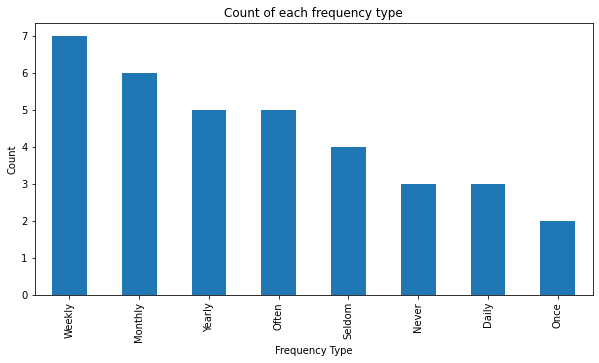

In [10]:
ax = df['freq_app_visit'].value_counts().plot(kind='bar',
                                            figsize=(10,5),
                                            title="Count of each frequency type")
ax.set_xlabel("Frequency Type")
ax.set_ylabel("Count")
plt.show()

___
### (5) Insert Record

In [11]:
# Values of record to insert
client_id = 1001
first_name = 'James'
last_name = 'Porter'
email = 'james_porter@gmail.com'
gender = 'Male'
car_make = 'Toyota'
race = 'English'
freq_app_visit = 'Seldom'

In [12]:
def insert_records():
    try:
        with connection.cursor() as cursor:
            sql = f"INSERT INTO customers (`id`, `first_name`, `last_name`, `email`, \
                                           `gender`, `car_make`, `race`, `freq_app_visit`) \
                                           VALUES (%s, %s, %s, %s, %s, %s, %s, %s);"
            cursor.execute(sql, (client_id, first_name, last_name, email, gender, car_make, \
                                 race, freq_app_visit))

        # Connection is not autocommit by default, so we must commit to save changes
        connection.commit()
        print(f'Successfully inserted records')
        
    except Exception as e:
        print(f'Error in insertion to MySQL database: {e}')

In [13]:
insert_records()

Successfully inserted records


In [14]:
get_records('SELECT * FROM customers WHERE id = 1001;')

Successfully retrieved records


,id,first_name,last_name,email,gender,car_make,race,freq_app_visit
0,1001,James,Porter,james_porter@gmail.com,Male,Toyota,English,Seldom
